In [111]:
# Библиотеки для работы с данными
import pandas as pd
import numpy as np

# Библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Библиотеки для обработки данных
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

# Библиотека для создания нейронных сетей
import tensorflow as tf
# Библиотека для создания модели классификации случайного леса
from sklearn.ensemble import RandomForestClassifier

# Библиотеки оценки эффективности
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Загружаем данные из файла
df = pd.read_csv("datasets/creditcard.csv")

In [3]:
# Вывод первых пяти значений
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("Имена признаков: ", df.columns)
print("Размерность данных: ",df.shape)

Имена признаков:  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Размерность данных:  (284807, 31)


In [5]:
# Выясним, есть ли пропущенные значения
df.isnull().any().any()

False

In [6]:
# Выясним, сколько случаев мошенничества зарегистрировано
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Тип данных признаков
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
# Преобразуем категориальные признаки к численным
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = LabelEncoder().fit_transform(df[column])
    if df[column].dtype == "bool":
        df[column] = df[column].apply(lambda x: int(x))

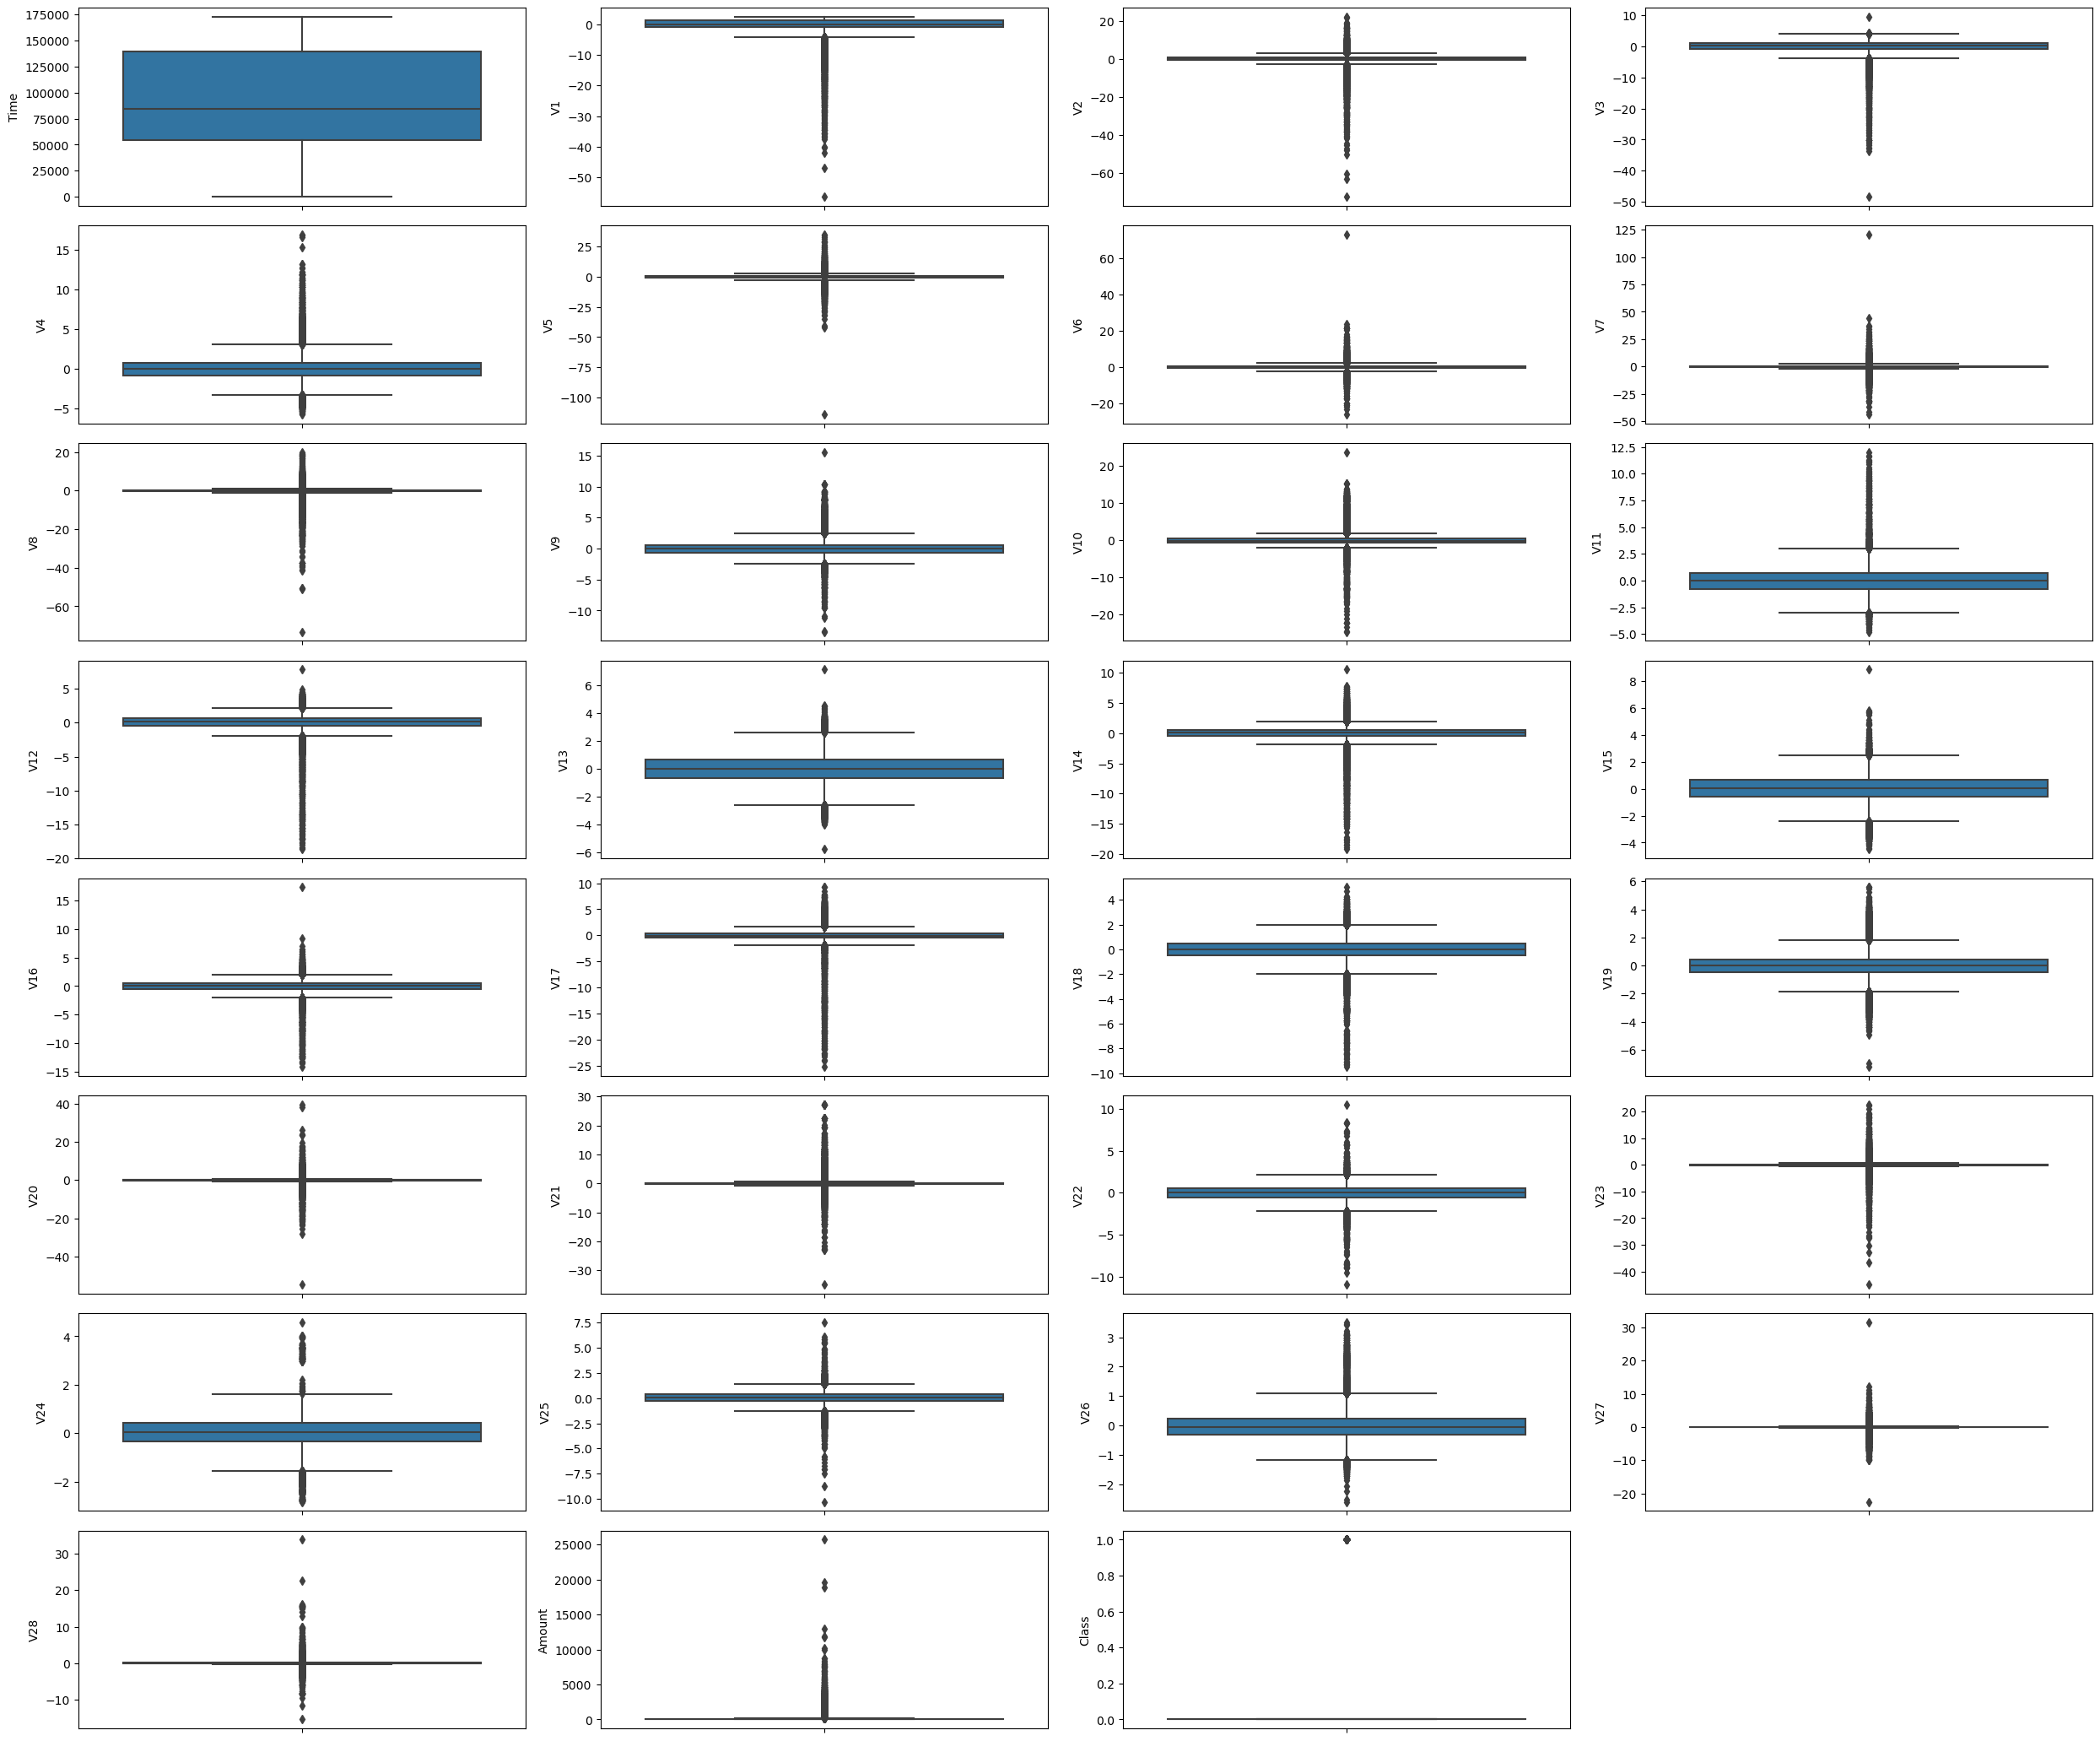

In [10]:
# Отрисовываем диаграмму размаха для всех признаков
plt.figure(figsize=(25, 80))

for i,col in enumerate(df.columns.to_list()):
    plt.subplot(int(np.ceil(df.columns.size)), 4, i + 1)
    sns.boxplot(y=col, data=df)

plt.tight_layout()

plt.show()

In [11]:
# Разделим данные на зависимую и независимые переменные
features = df.drop(columns=["Class"]).to_numpy()
labels = df["Class"].to_numpy()

In [12]:
# Выявим выбросы в данных с помощью алгоритма изоляционного леса
isoForest = IsolationForest(contamination=0.07,random_state=0)

In [13]:
isoForest.fit(features)

IsolationForest(contamination=0.07, random_state=0)

In [14]:
# выявим выбросы в данных
is_anomaly = pd.DataFrame(isoForest.predict(features))
is_anomaly.value_counts()

 1    264870
-1     19937
dtype: int64

In [15]:
# Запишем индексы выбросов в ввиде массива булевых значений
anomaly_indices = list()

for i in range(is_anomaly.size):
    # Оставим данные минорного класса, так как, скорее всего, такие данные были ошибочно
    # помечены как выбросы
    anomaly_indices.append(is_anomaly[0][i] == -1 and df["Class"][i] == 0)
    
anomaly_indices = df[np.array(anomaly_indices)].index
anomaly_indices[-5:] #пять последних элементов

Int64Index([284765, 284772, 284782, 284795, 284802], dtype='int64')

In [16]:
anomaly_indices.size

19514

In [17]:
np.sum(df.iloc[anomaly_indices]["Class"] == 1)
np.sum(df.iloc[anomaly_indices]["Class"] == 0)

19514

In [18]:
# Доля аномалий относительно всего датасета
anomaly_indices.size / df.shape[0]

0.06851657438194989

In [19]:
# Удалим выбросы из датасета, сбросим индексы
df.drop(index=anomaly_indices, inplace=True)
df.reset_index()
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0


In [20]:
# Вновь разделим данные на зависимую и независимые переменные
features = df.drop(columns=["Class"]).to_numpy()
labels = df["Class"].to_numpy()

In [21]:
# Выберем 10 лучших признаков с помощью алгоритма selectKBest 
# на основании значения ANOVA-F
kBest = SelectKBest(score_func=f_classif, k=10)

In [22]:
fitResult = kBest.fit(features, labels)
print("Оценки признаков: ", fitResult.scores_)
print("Индексы лучших признаков:", kBest.get_support(indices=True))

Оценки признаков:  [4.53285973e+01 6.07604468e+03 5.92482515e+03 1.42957479e+04
 5.89513879e+03 4.37353133e+03 6.51847532e+02 2.15019998e+04
 2.77660671e+02 3.22685912e+03 2.35270232e+04 7.33442368e+03
 2.31561932e+04 4.83177513e+00 3.57543741e+04 5.28684846e+00
 1.26107146e+04 3.99824298e+04 3.73527249e+03 3.64774283e+02
 6.60971495e+02 1.63743878e+03 5.03727153e-02 8.00381438e+00
 1.63773533e+01 3.99881806e+00 6.44835663e+00 2.35216914e+02
 1.01637579e+02 1.27199060e+02]
Индексы лучших признаков: [ 1  2  3  7 10 11 12 14 16 17]


In [23]:
# Достанем имена признаков из номеров
most_important_features_names = df.columns[kBest.get_support(indices=True)].to_list()
print("Имена 10 самых значимых признаков", most_important_features_names)
# Выберем 10 самых значимых признаков
selected_features = features[:, kBest.get_support(indices=True)]
selected_features[:3]

Имена 10 самых значимых признаков ['V1', 'V2', 'V3', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']


array([[-1.35980713, -0.07278117,  2.53634674,  0.23959855,  0.09079417,
        -0.55159953, -0.61780086, -0.31116935, -0.47040053,  0.20797124],
       [ 1.19185711,  0.26615071,  0.16648011, -0.07880298, -0.16697441,
         1.61272666,  1.06523531, -0.1437723 ,  0.46391704, -0.11480466],
       [-0.96627171, -0.18522601,  1.79299334,  0.23760894, -0.05495192,
        -0.22648726,  0.17822823, -0.28792375, -1.05964725, -0.68409279]])

In [24]:
# Стандартизируем данные
std_scaler = StandardScaler()
selected_features = std_scaler.fit_transform(selected_features)
selected_features[:2]

array([[-1.11834893, -0.11807466,  1.80298007,  0.26457504,  0.17007473,
        -0.54506754, -0.65461643, -0.35185354, -0.56613076,  0.29896384],
       [ 0.64133452,  0.20714399,  0.05735582, -0.09815055, -0.13344851,
         1.61850842,  1.11105737, -0.15975794,  0.54802319, -0.10932415]])

In [25]:
selected_features.shape, labels.shape

((265293, 10), (265293,))

In [26]:
# Разделим данные на обучающую и тестовую выборки в отношении 85/15
features_train, features_test, labels_train, labels_test = train_test_split(selected_features, labels, test_size=0.15, random_state=10)

In [27]:
# Разделим данные на обучающую и тестовую выборки в отношении 7/3
# особенность разделения в том, что данные делятся на основании 
# значений зависимой переменной, т.е. в обучающей выборке гарантированно 
# будет 70% мошеннических случаев и в тестовой 30%
sss = StratifiedShuffleSplit(n_splits=8, test_size=0.3, random_state=0)
sss.get_n_splits(selected_features, labels)

8

In [28]:
df_features = df.drop(columns=["Class"]).copy()

In [29]:
# Запомним индексы выбранных значений
train_indices, test_indices = list(), list()

for i, (train_index, test_index) in enumerate(sss.split(selected_features, labels)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}, shape={train_index.shape}")
    print(f"  Test:  index={test_index}, shape={test_index.shape}")
    train_indices, test_indices = train_index, test_index

Fold 0:
  Train: index=[158627 252126  31133 ... 259486 117150 181242], shape=(185705,)
  Test:  index=[ 61660  20012 156053 ...  47047  12666 156621], shape=(79588,)
Fold 1:
  Train: index=[ 36501 229269 152102 ... 182014 221813  13280], shape=(185705,)
  Test:  index=[182045 246786 103991 ...  23638 227969  65174], shape=(79588,)
Fold 2:
  Train: index=[ 34457 261882  96622 ...  17266 121629 204207], shape=(185705,)
  Test:  index=[ 50292  35369  25143 ... 178659 164422  43913], shape=(79588,)
Fold 3:
  Train: index=[ 52111  43411  58380 ... 110482  10926 157118], shape=(185705,)
  Test:  index=[ 91274 218454 188908 ... 233165  77637 261783], shape=(79588,)
Fold 4:
  Train: index=[259291  50084 182551 ... 249008 235970  90567], shape=(185705,)
  Test:  index=[ 75777 101275 152152 ... 178439 253408  69840], shape=(79588,)
Fold 5:
  Train: index=[232362  87056 125219 ... 113229 260767  17247], shape=(185705,)
  Test:  index=[35238 20794  3209 ... 23737 25298 30335], shape=(79588,)
Fold

In [30]:
selected_features.shape

(265293, 10)

In [31]:
X_train, X_test = selected_features[train_indices], selected_features[test_indices]
Y_train, Y_test = labels[train_indices], labels[test_indices]

In [32]:
# Доля мошеннических случаев в тестовой и тренировочной выборках
print("Доля мошеннических случаев в тренировочной выборке = ", np.sum(Y_train == 1))
print("Доля мошеннических случаев в тестовой выборке = ", np.sum(Y_test == 1))

Доля мошеннических случаев в тренировочной выборке =  344
Доля мошеннических случаев в тестовой выборке =  148


In [33]:
# Выясним долю мошеннических операций
print(f"Доля мошеннических операций = {(np.sum(Y_train == 1) / np.sum(Y_train == 0)) * 100} %")

Доля мошеннических операций = 0.18558380673388686 %


In [34]:
# Выкинем данные по алгоритму NearMiss для увеличения доли мошеннических операций до 5%
underX_Train, underY_Train = NearMiss(sampling_strategy=0.03).fit_resample(X_train, Y_train)

In [35]:
underX_Train.shape

(11810, 10)

In [36]:
# Выясним долю мошеннических операций
print(f"Доля мошеннических операций = {(np.sum(underY_Train == 1) / np.sum(underY_Train == 0)) * 100} %")

Доля мошеннических операций = 3.0001744287458574 %


In [37]:
print(np.sum(underY_Train == 0))
print(np.sum(underY_Train == 1))

11466
344


In [38]:
# Сгенерируем данные мошеннических операций алгоритмом SMOTE, подвидом borderline-1
smoteAlg = BorderlineSMOTE(kind='borderline-1', sampling_strategy="minority")
preparedX_train, preparedY_train = smoteAlg.fit_resample(underX_Train, underY_Train)

In [39]:
preparedX_train.shape

(22932, 10)

In [40]:
print(np.sum(preparedY_train == 0))
print(np.sum(preparedY_train == 1))

11466
11466


In [41]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #  

In [47]:
feature_normalization_layer = tf.keras.layers.Normalization()
feature_normalization_layer.adapt(preparedX_train)

In [153]:
# Объявим модель с входным слоем, 5-ю скрытыми слоями с фун-ей активации selu
# и выходной слой с фун-ей активации sigmoid для бинарной классификации
model = tf.keras.Sequential([
    #feature_normalization_layer,
    tf.keras.layers.Input(shape=(preparedX_train.shape[1],)),
    tf.keras.layers.Dense(units=128, activation="selu", kernel_initializer="lecun_normal"),
    tf.keras.layers.Dense(units=256, activation="selu", kernel_initializer="lecun_normal"),
    tf.keras.layers.Dense(units=512, activation="selu", kernel_initializer="lecun_normal"),
    tf.keras.layers.Dense(units=256, activation="selu", kernel_initializer="lecun_normal"),
    tf.keras.layers.Dense(units=128, activation="selu", kernel_initializer="lecun_normal"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 128)               1408      
                                                                 
 dense_67 (Dense)            (None, 256)               33024     
                                                                 
 dense_68 (Dense)            (None, 512)               131584    
                                                                 
 dense_69 (Dense)            (None, 256)               131328    
                                                                 
 dense_70 (Dense)            (None, 128)               32896     
                                                                 
 dense_71 (Dense)            (None, 1)                 129       
                                                                 
Total params: 330,369
Trainable params: 330,369
Non-t

In [154]:
# Соберем модель с функцией потерь бинарной кроссэнтропией, 
# Оптимизатором Адам и метриками полноты и бинарной точности для оценки эффективности
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=10**-4),
    #optimizer=tf.keras.optimizers.SGD(),
    metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.BinaryAccuracy()]
)

In [155]:
# Начнем обучать модель на преобразованных данных 100 эпох, делая проверки на тестовой выборке каждые две эпохи
# Установим фунцию ранней остановки обучения, которая прервет обучение, если полученная 
# метрика "val_binary_accuracy" будет 4 раза снижаться, после остановки модели будут присвоены веса на 
# лучшей эпохе
history = model.fit(preparedX_train, preparedY_train, epochs=100, batch_size=32 ,
          callbacks=tf.keras.callbacks.EarlyStopping(monitor="val_binary_accuracy", patience=4, restore_best_weights=True),
          validation_data=(X_test, Y_test), validation_freq=2)

Epoch 1/100
717/717 [==============================] - 3s 4ms/step - loss: 0.0858 - recall_11: 0.9707 - binary_accuracy: 0.9701
Epoch 2/100
717/717 [==============================] - 8s 11ms/step - loss: 0.0504 - recall_11: 0.9881 - binary_accuracy: 0.9840 - val_loss: 0.8299 - val_recall_11: 0.9392 - val_binary_accuracy: 0.7732
Epoch 3/100
717/717 [==============================] - 3s 4ms/step - loss: 0.0381 - recall_11: 0.9917 - binary_accuracy: 0.9884
Epoch 4/100
717/717 [==============================] - 7s 10ms/step - loss: 0.0327 - recall_11: 0.9935 - binary_accuracy: 0.9899 - val_loss: 0.4805 - val_recall_11: 0.9392 - val_binary_accuracy: 0.8666
Epoch 5/100
717/717 [==============================] - 3s 4ms/step - loss: 0.0302 - recall_11: 0.9932 - binary_accuracy: 0.9907
Epoch 6/100
717/717 [==============================] - 7s 10ms/step - loss: 0.0250 - recall_11: 0.9953 - binary_accuracy: 0.9926 - val_loss: 0.7060 - val_recall_11: 0.9324 - val_binary_accuracy: 0.8312
Epoch 7/10

717/717 [==============================] - 7s 10ms/step - loss: 0.0074 - recall_11: 0.9981 - binary_accuracy: 0.9981 - val_loss: 0.3269 - val_recall_11: 0.9122 - val_binary_accuracy: 0.9377
Epoch 29/100
717/717 [==============================] - 3s 4ms/step - loss: 0.0047 - recall_11: 0.9990 - binary_accuracy: 0.9989
Epoch 30/100
717/717 [==============================] - 7s 10ms/step - loss: 0.0065 - recall_11: 0.9981 - binary_accuracy: 0.9982 - val_loss: 0.4410 - val_recall_11: 0.9257 - val_binary_accuracy: 0.9358
Epoch 31/100
717/717 [==============================] - 3s 4ms/step - loss: 0.0046 - recall_11: 0.9990 - binary_accuracy: 0.9989
Epoch 32/100
717/717 [==============================] - 7s 10ms/step - loss: 0.0041 - recall_11: 0.9989 - binary_accuracy: 0.9990 - val_loss: 0.5436 - val_recall_11: 0.9122 - val_binary_accuracy: 0.9111
Epoch 33/100
717/717 [==============================] - 3s 4ms/step - loss: 0.0035 - recall_11: 0.9992 - binary_accuracy: 0.9993
Epoch 34/100
717/

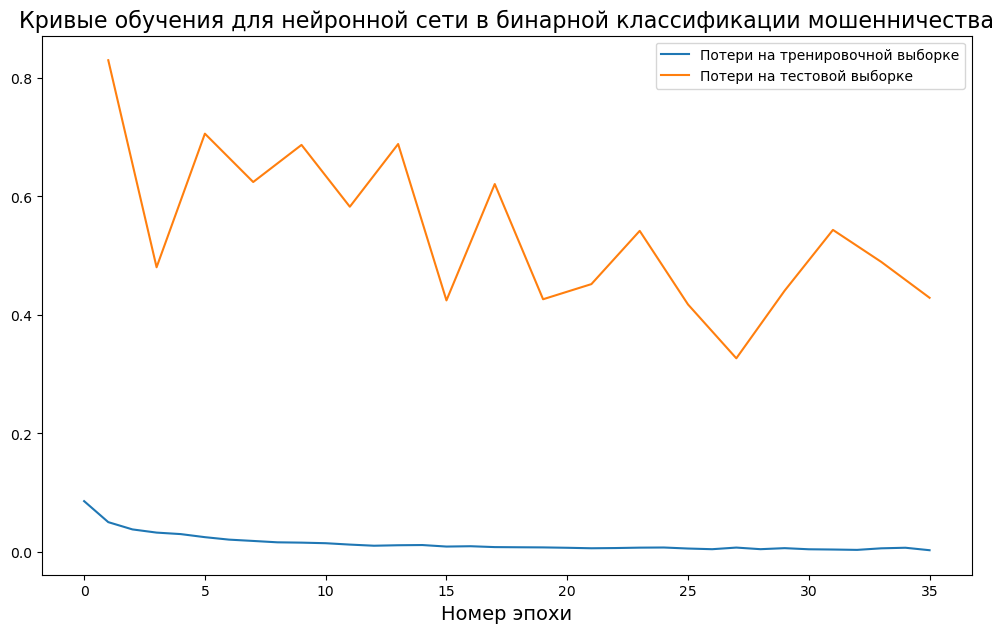

In [179]:
# Отрисуем кривые обучения
plt.figure(figsize=(12, 7))

plt.plot(history.epoch, history.history['loss'], label="Потери на тренировочной выборке")
plt.plot(history.epoch[1::2], history.history['val_loss'], label="Потери на тестовой выборке")

plt.title('Кривые обучения для нейронной сети в бинарной классификации мошенничества', size=16)
plt.xlabel('Номер эпохи', size=14)

plt.legend();

In [113]:
# Получим предсказания нейронной сети на тестовой выборке
nn_y_predict = model.predict(X_test)

2488/2488 [==============================] - 3s 1ms/step


In [114]:
# Преобразуем вероятности в классы
nn_y_predict_labels = np.array(np.floor(nn_y_predict + 0.5), dtype=np.int64)
nn_y_predict_labels

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [135]:
# Получим отчет о классификации
print('Classification report:\n', classification_report(Y_test, nn_y_predict_labels))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97     79440
           1       0.02      0.91      0.05       148

    accuracy                           0.93     79588
   macro avg       0.51      0.92      0.51     79588
weighted avg       1.00      0.93      0.96     79588



In [131]:
# Построим матрицу ошибок 
nn_conf_mat = confusion_matrix(Y_test, nn_y_predict_labels)
nn_conf_mat

array([[74113,  5327],
       [   13,   135]], dtype=int64)

<Axes: >

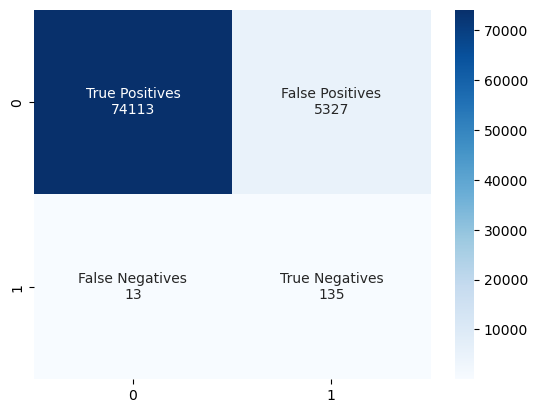

In [132]:
# Отобразим матрицу ошибок нейронной сети
names = ["True Positives", "False Positives", "False Negatives", "True Negatives"]
label_names = list()

for i in range(len(names)):
    label_names.append(names[i] + "\n" + str(nn_conf_mat.reshape(-1)[i]))

label_names = np.asarray(label_names).reshape(2,2)
sns.heatmap(nn_conf_mat, annot=label_names, fmt="", cmap="Blues")

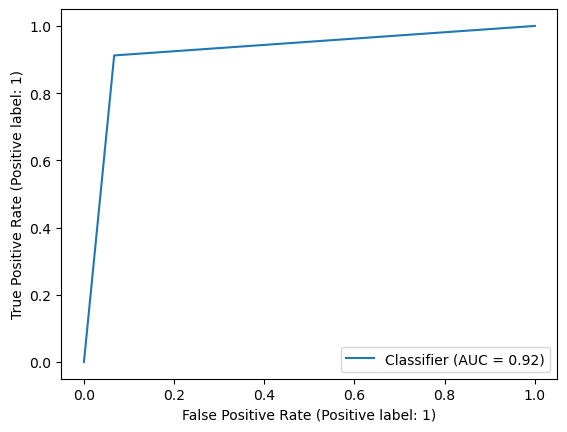

In [134]:
# Построим ROC кривую
RocCurveDisplay.from_predictions(y_true=Y_test, y_pred=nn_y_predict_labels)

In [138]:
# Построим классификатор случайного леса и обучим его
randomForest = RandomForestClassifier(random_state=5, n_estimators=100, n_jobs=-1)
randomForest.fit(preparedX_train, preparedY_train)

RandomForestClassifier(n_jobs=-1, random_state=5)

In [139]:
# Получим предсказания случайного леса
rndFrst_predicted = randomForest.predict(X_test)

In [140]:
# Получим отчет о классификации
print('Classification report:\n', classification_report(Y_test, rndFrst_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     79440
           1       0.04      0.90      0.09       148

    accuracy                           0.96     79588
   macro avg       0.52      0.93      0.53     79588
weighted avg       1.00      0.96      0.98     79588



In [141]:
# Вычислим матрицу ошибок случайного леса
rnd_frst_conf_mat = confusion_matrix(Y_test, rndFrst_predicted)
rnd_frst_conf_mat

array([[76615,  2825],
       [   15,   133]], dtype=int64)

<Axes: >

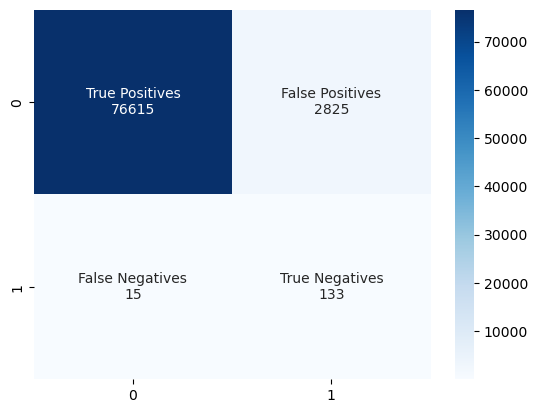

In [142]:
# Отобразим матрицу ошибок случайного леса
names = ["True Positives", "False Positives", "False Negatives", "True Negatives"]
label_names = list()

for i in range(len(names)):
    label_names.append(names[i] + "\n" + str(rnd_frst_conf_mat.reshape(-1)[i]))

label_names = np.asarray(label_names).reshape(2,2)
sns.heatmap(rnd_frst_conf_mat, annot=label_names, fmt="", cmap="Blues")

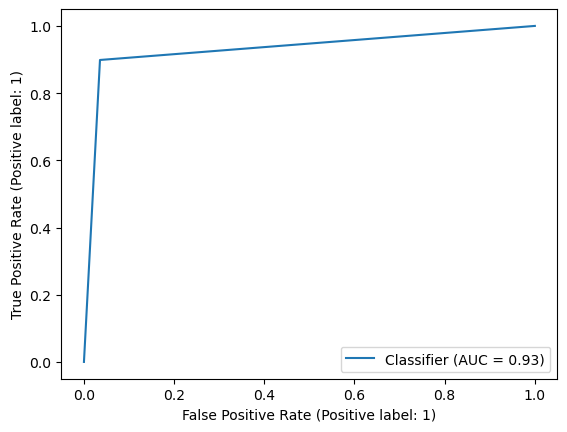

In [100]:
# Построим ROC кривую для случайного леса
RocCurveDisplay.from_predictions(y_true=Y_test, y_pred=predicted)